<a href="https://colab.research.google.com/github/JMML2021/Avaluaci-final-per-passar-a-projecte/blob/main/Calculo%20Vueling%202022%20con%20codigos%20Rev%20G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


In [85]:
# Ocultando código en jupyter notebook

# https://sebastiandres.github.io/blog/cells-toggle/



def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

# Cargar fichero de # Abrimos los ficheros 

In [86]:

from google.colab import drive
drive.mount('/content/drive')

Codigo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'

In [5]:
#path= '/content/drive/MyDrive/Ficheros de Vueling/2022.06.03 2022_delay + cierre puertas.xlsx'

In [6]:
# Abrir fichero de Github.
#path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'
Hoja = 'FLT_2022'

df = pd.read_excel(path, sheet_name=Hoja)


In [7]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['DATE                             ', 'FLT    ', 'REG   ', 'AC ', 'DEP',
       'ARR', 'STD  ', 'STA  ', 'TKof ',
       'TDwn                                                      ', 'ATD  ',
       'ATA  ', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX  ', 'LF ',
       'Taxi-out', 'Taxi-In', 'SLOT       ', 'C1', 'DLY1 ', 'Sub1', 'C2',
       'DLY2 ', 'Sub2', 'C3', 'DLY3 ', 'Sub3', 'C4', 'DLY4 ', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2'],
      dtype='object')

In [8]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'FLT', 'REG', 'AC', 'DEP',
       'ARR', 'STD', 'STA', 'TKof', 'TDwn', 'ATD',
       'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2',
       'DLY2', 'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2']

In [84]:
#@Tiempodel close Pax Door
df['Close Pax Door']

0     2022-01-01 07:58:00
1     2022-01-01 09:48:00
2     2022-01-01 11:38:00
3     2022-01-01 13:18:00
4     2022-01-01 15:07:00
              ...        
217   2022-01-01 11:40:00
218   2022-01-01 14:47:00
219   2022-01-01 18:03:00
220   2022-01-01 20:42:00
221   2022-01-01 10:48:00
Name: Close Pax Door, Length: 222, dtype: datetime64[ns]

In [10]:
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

0 DATE                              * DATE -
1 FLT     * FLT -
2 REG    * REG -
3 AC  * AC -
4 DEP * DEP -
5 ARR * ARR -
6 STD   * STD -
7 STA   * STA -
8 TKof  * TKof -
9 TDwn                                                       * TDwn -
10 ATD   * ATD -
11 ATA   * ATA -
12 BLOCK * BLOCK -
13 FLThr * FLThr -
14 DStand * DStand -
15 AStand * AStand -
16 ACT PAX   * ACT PAX -
17 LF  * LF -
18 Taxi-out * Taxi-out -
19 Taxi-In * Taxi-In -
20 SLOT        * SLOT -
21 C1 * C1 -
22 DLY1  * DLY1 -
23 Sub1 * Sub1 -
24 C2 * C2 -
25 DLY2  * DLY2 -
26 Sub2 * Sub2 -
27 C3 * C3 -
28 DLY3  * DLY3 -
29 Sub3 * Sub3 -
30 C4 * C4 -
31 DLY4  * DLY4 -
32 Sub4 * Sub4 -
33 C1Arr * C1Arr -
34 DLY1Arr * DLY1Arr -
35 Close Pax Door * Close Pax Door -
36 Close Cargo Door * Close Cargo Door -
37 Open Cargo/Pax Door * Open Cargo/Pax Door -
38 close pax door2 * close pax door2 -
39 close cargo door2 * close cargo door2 -
40 open cargo/pax door2 * open cargo/pax door2 -


In [11]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

   Secuencia       STD  DEP
0        1.0  07:40:00  BIO
1        2.0  09:40:00  SVQ
2        3.0  11:40:00  BIO
3        4.0  13:30:00  SCQ


In [12]:
# Identifico los Aeropuertos principales.

path =(r"/content/drive/MyDrive/Flights Movement 2019-2022 MAR.xlsx")
 
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head

In [13]:
df

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,07:40:00,09:05:00,08:10:00,09:17:00,...,,8,00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,07:58,07:31,09:23,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,09:40:00,11:05:00,10:03:00,11:07:00,...,,8,00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,09:48,09:46,11:11,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,11:40:00,12:50:00,11:50:00,12:40:00,...,,,NaN,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,11:38,11:34,12:46,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,13:30:00,14:35:00,13:30:00,14:08:00,...,,,NaN,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,13:18,13:06,14:12,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,15:15:00,18:20:00,15:23:00,18:07:00,...,,,NaN,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,15:07,15:01,18:14,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01-01,1898,EC-MKO,32A,BCN,DUS,11:45:00,14:00:00,11:55:00,13:45:00,...,,,NaN,2022-01-01 11:40:00.000,2022-01-01 11:41:00.000,2022-01-01 13:51:00.000,11:40,11:41,13:51,1.0
218,2022-01-01,1899,EC-MKO,32A,DUS,BCN,14:40:00,16:50:00,15:02:00,16:50:00,...,,8,00:04:00,2022-01-01 14:47:00.000,2022-01-01 14:40:00.000,2022-01-01 16:56:00.000,14:47,14:40,16:56,2.0
219,2022-01-01,8462,EC-MKO,32A,BCN,LIS,17:55:00,19:55:00,18:39:00,20:15:00,...,,8,00:24:00,2022-01-01 18:03:00.000,2022-01-01 18:01:00.000,2022-01-01 20:20:00.000,18:03,18:01,20:20,3.0
220,2022-01-01,8463,EC-MKO,32A,LIS,BCN,20:40:00,22:35:00,20:58:00,22:25:00,...,,8,00:03:00,2022-01-01 20:42:00.000,2022-01-01 20:41:00.000,2022-01-01 22:38:00.000,20:42,20:41,22:38,4.0


In [14]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia'],
      dtype='object')

In [15]:
# Convierto todas las columnas de tiempo en un formato correcto

formato = "%H:%M:%S"


def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')

'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     'DLY1Arr','close pax door2', 'close cargo door2', 'open cargo/pax door2',
                     'SLOT', 'DLY1', 'DLY2']
'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     
               ]

for x in columnasConvertir:
    convertirTiempo(x)


In [16]:
#Subrutina que suma las fechas con las horas.

def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [17]:
df['STD']

0     1900-01-01 07:40:00
1     1900-01-01 09:40:00
2     1900-01-01 11:40:00
3     1900-01-01 13:30:00
4     1900-01-01 15:15:00
              ...        
217   1900-01-01 11:45:00
218   1900-01-01 14:40:00
219   1900-01-01 17:55:00
220   1900-01-01 20:40:00
221   1900-01-01 11:00:00
Name: STD, Length: 222, dtype: datetime64[ns]

In [18]:
df1=df.copy()
print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr',
                  'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


0   1900-01-01 07:40:00
1   1900-01-01 09:40:00
2   1900-01-01 11:40:00
3   1900-01-01 13:30:00
4   1900-01-01 15:15:00
Name: STD, dtype: datetime64[ns]
.....Clave:  Date_STD .... DATE STD
.....Clave:  Date_STA .... DATE STA
.....Clave:  Date_TKof .... DATE TKof
.....Clave:  Date_TDwn .... DATE TDwn
.....Clave:  Date_ATD .... DATE ATD
.....Clave:  Date_ATA .... DATE ATA
.....Clave:  Date_BLOCK .... DATE BLOCK
.....Clave:  Date_FLThr .... DATE FLThr
.....Clave:  Date_close pax door2 .... DATE close pax door2
.....Clave:  Date_close cargo door2 .... DATE close cargo door2


In [19]:
#Añado eL mes

df['MES'] = df['STD'].dt.month

# Convierto todas las columnas de tiempo en un formato correcto

# Identificacion de los principales Aeropuertos

In [20]:
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia,MES,Aeropuerto_Key,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,2022-01-01 07:58:00,2022-01-01 07:31:00,09:23,1.0,1,BIO,SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,2022-01-01 09:48:00,2022-01-01 09:46:00,11:11,2.0,1,SVQ,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,2022-01-01 11:38:00,2022-01-01 11:34:00,12:46,3.0,1,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,2022-01-01 13:18:00,2022-01-01 13:06:00,14:12,4.0,1,SCQ,BIO


# Calculo tiempo en vuelo 1

In [21]:
df.columns
#print(df['Close Pax Door'])

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1'],
      dtype='object')

In [22]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [23]:
df['Close Pax Door']

0      2022-01-01 07:58:00.000
1      2022-01-01 09:48:00.000
2      2022-01-01 11:38:00.000
3      2022-01-01 13:18:00.000
4      2022-01-01 15:07:00.000
                ...           
217    2022-01-01 11:40:00.000
218    2022-01-01 14:47:00.000
219    2022-01-01 18:03:00.000
220    2022-01-01 20:42:00.000
221    2022-01-01 10:48:00.000
Name: Close Pax Door, Length: 222, dtype: object

In [24]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   1900-01-01 08:00:00
1   1900-01-01 09:51:00
2   1900-01-01 11:40:00
3   1900-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [25]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0      -2.0
1      -3.0
2      -2.0
3      -5.0
4       0.0
       ... 
217    -2.0
218     0.0
219   -20.0
220    -5.0
221    -9.0
Name: t_ClosePax, Length: 222, dtype: float64

In [26]:
#df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
#df['Retardo_Abrir_Puerta_Pax']

In [27]:
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['Open Cargo/Pax Door'] =pd.to_datetime(df['Open Cargo/Pax Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 

#
#df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas', 'Open Cargo/Pax Door']]##.head(4)




In [28]:
df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
df[['Retardo_Abrir_Puerta_Pax', 'Open Cargo/Pax Door','ATA']]

,Retardo_Abrir_Puerta_Pax,Open Cargo/Pax Door,ATA
0,0 days 00:03:00,2022-01-01 09:23:00,2022-01-01 09:20:00
1,0 days 00:02:00,2022-01-01 11:11:00,2022-01-01 11:09:00
2,0 days 00:01:00,2022-01-01 12:46:00,2022-01-01 12:45:00
3,0 days 00:01:00,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0 days 00:00:00,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
217,0 days 00:00:00,2022-01-01 13:51:00,2022-01-01 13:51:00
218,0 days 00:02:00,2022-01-01 16:56:00,2022-01-01 16:54:00
219,0 days 00:01:00,2022-01-01 20:20:00,2022-01-01 20:19:00
220,0 days 00:00:00,2022-01-01 22:38:00,2022-01-01 22:38:00


In [29]:
df['t_Close_Cargo_Door']

0     -29.0
1      -5.0
2      -6.0
3     -17.0
4      -6.0
       ... 
217    -1.0
218    -7.0
219   -22.0
220    -6.0
221    -7.0
Name: t_Close_Cargo_Door, Length: 222, dtype: float64

In [30]:
# Estudio los trayectos.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [31]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()


df1=df
df1.head(2)



,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key,AeropuertoKey1,DuracionVueloTeorico,DuracionVueloReal,E_Duracion_Vuelo,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Retardo_Abrir_Puerta_Pax,Trayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SVQ,85.0,80.0,-5.0,-2.0,-29.0,-27.0,0 days 00:03:00,BIO-SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,SVQ,BIO,85.0,78.0,-7.0,-3.0,-5.0,-2.0,0 days 00:02:00,BIO-SVQ


In [32]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


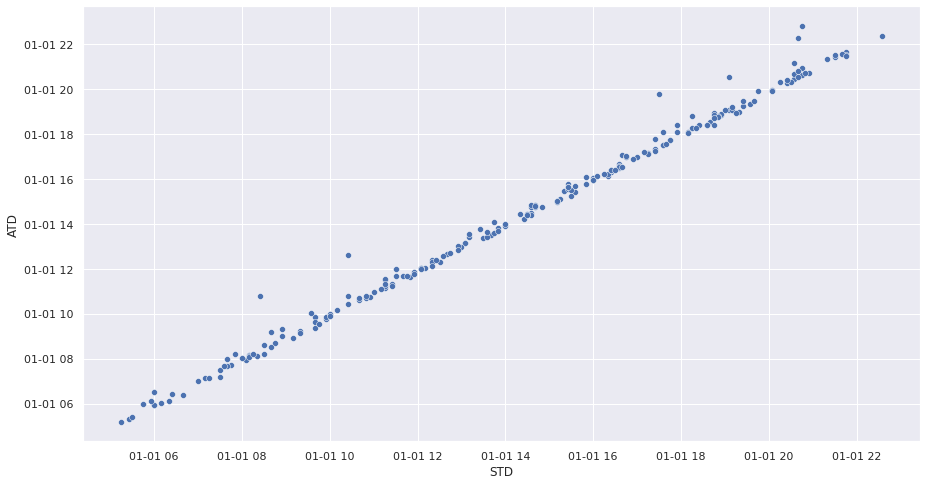

In [93]:
 #@title
 #Grafico de correlacion
ax = sns.scatterplot( df1['STD'], df1['ATD'])

# Calculo error del primer despegue.

In [34]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [35]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [36]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['DATE','REG', 'Secuencia','STD', 'ATD']][0:8])

print('Media = ', df1['E_Despegue'].mean())

         DATE     REG  Secuencia                 STD                 ATD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00 2022-01-01 17:31:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00 2022-01-01 05:20:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00 2022-01-01 07:29:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00 2022-01-01 12:01:00
Media =  2.77027027027027


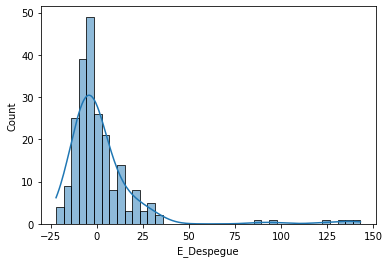

In [37]:
sns.histplot(data= df1.E_Despegue, kde= True)

# Vemos que hay mucha dispersion hay que filtrar los datos a:
## error de salida > 30 y < 30 y es el primer despegue


Media filtrada =  -1.44 minutos


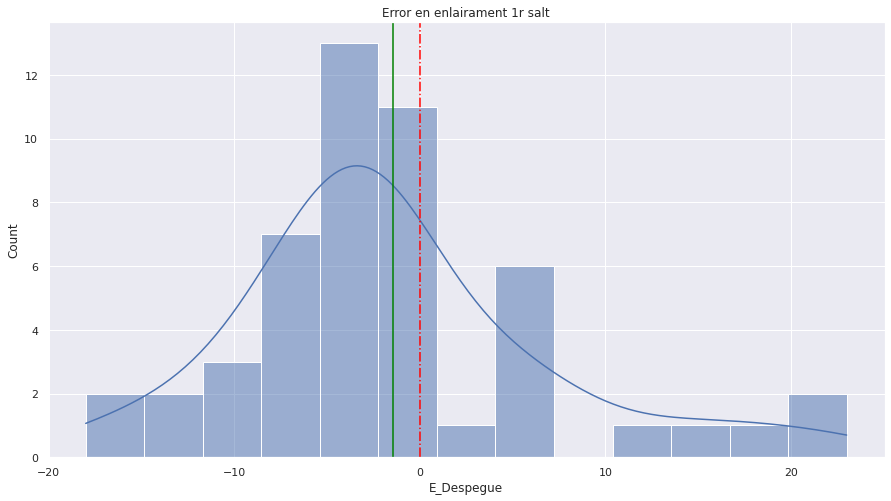

In [113]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
#
p= sns.histplot(data= df2.E_Despegue, kde= True)
p.set_title("Error en enlairament 1r salt")
mediaFiltrada = round(df2['E_Despegue'].mean(),2)
plt.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
plt.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Media filtrada = ', mediaFiltrada, 'minutos')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 

Puntualidad BCN en el 1r enlairament: -3.72


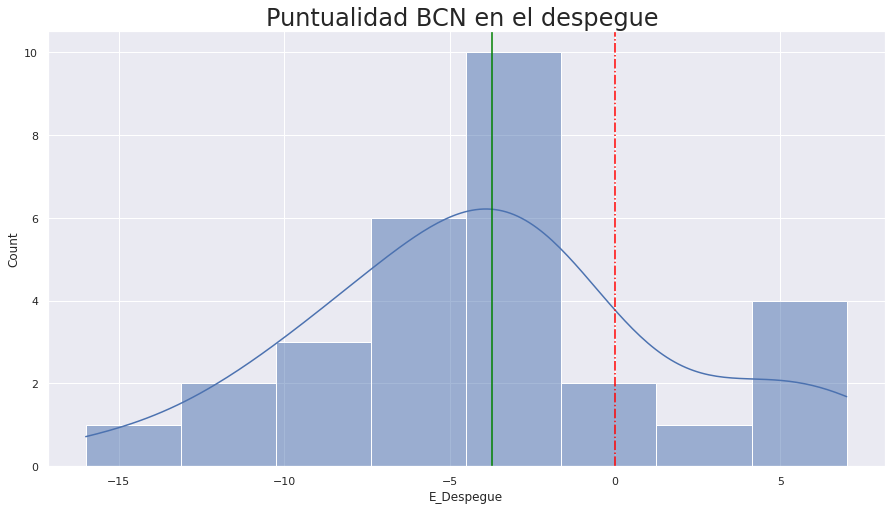

In [116]:
# Para saber la puntualidad solo de Barcelona
df2barcelonaPuntualida = (df2['DEP']== 'BCN')


df2BarcelonaPuntualida = df2[df2barcelonaPuntualida]
df2barcelonaPuntualida.head()

#df2BarcelonaPuntualida.head()
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)#
print('Puntualidad BCN en el 1r enlairament:' , puntualidadBCN )
#print(df2BarcelonaPuntualida[[ 'DATE',   'FLT',     'REG',  'AC', 'DEP',  'ARR']] )
p=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True).set_title('Puntualidad BCN en el despegue ', fontsize = 24)


#Linea d'objectius 
plt.axvline(puntualidadBCN, 0,12, color = 'green')                       # Media real
plt.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
#ax.set_title('Puntualidad principales aeropuertos en el 1 Despegue:', fontsize = 24)


Text(0.5, 1.0, 'Puntualidad principales aeropuertos en el 1 Despegue:')

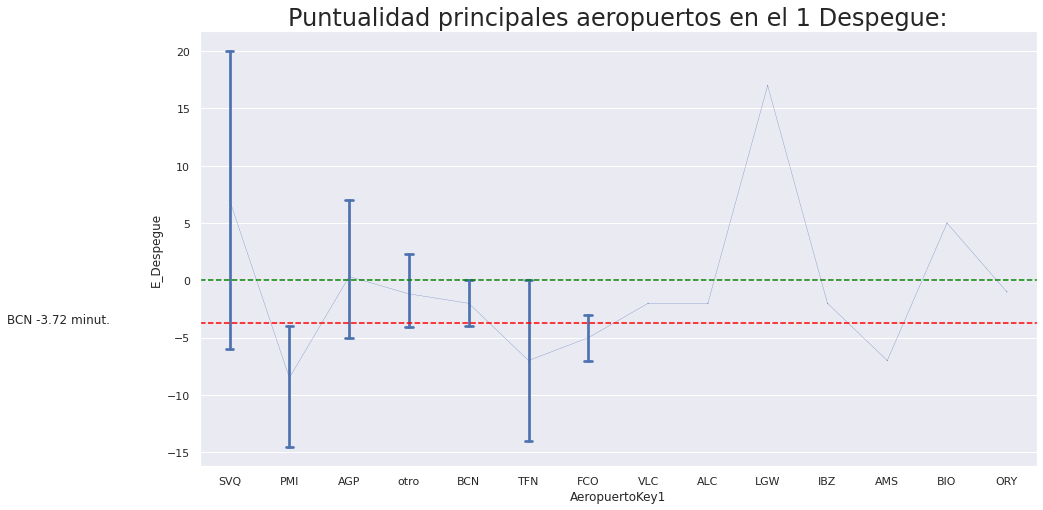

In [40]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos en el 1 Despegue:', fontsize = 24)

# tiempo 'Close Cargo Door'  -   'Close Pax'


Media filtrada =  -26.22 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


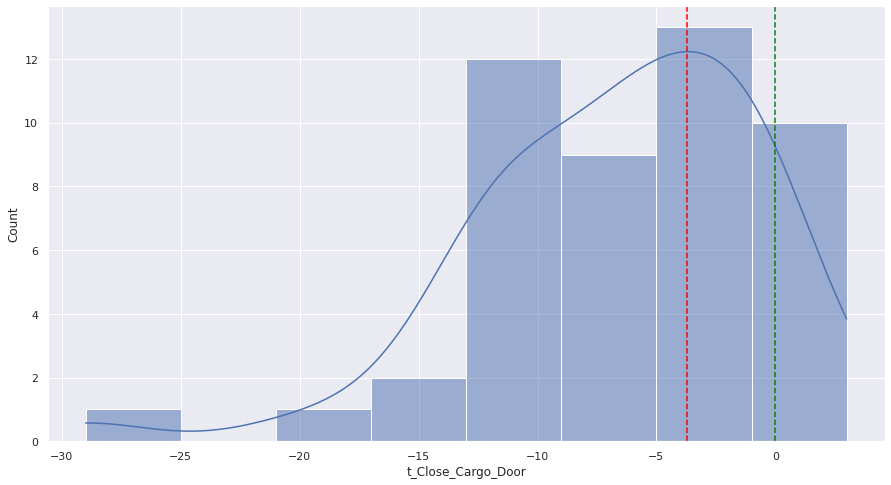

In [41]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 30) & (df1['t_Close_Cargo_Door']> -30))

df2 = df2[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -20.99 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


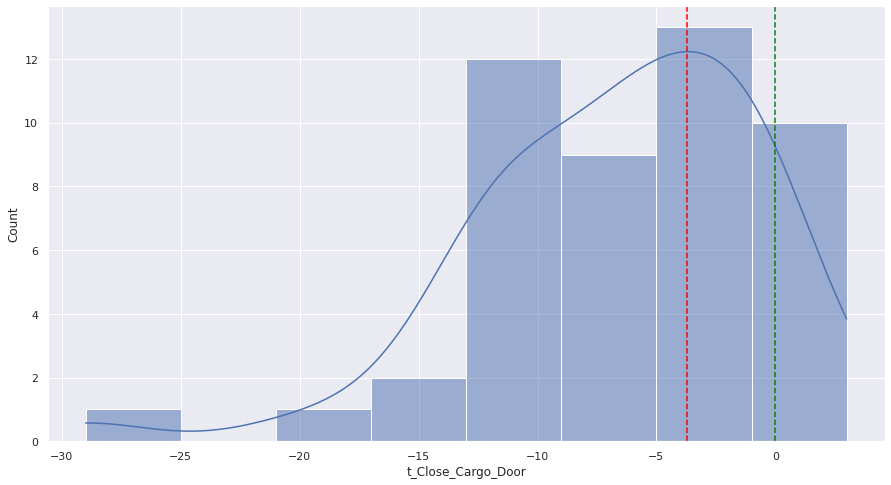

In [42]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


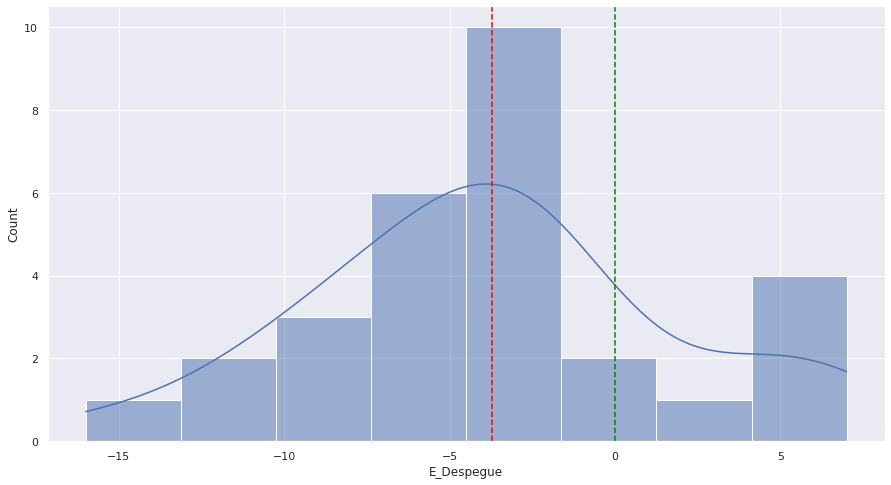

In [43]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [44]:
#Creamos los LAGs

df= df.sort_values(['DATE', 'REG', 'STD'])


df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 

#adecuarFechas('Pasajeros', 'ACT PAX  ')
df[f'lag_ACT PAX']= df['ACT PAX'].shift(periods=-1) 

#Lag de la siguiente secuencia
df[f'lag_Secuencia']= df['Secuencia'].shift(periods=-1) 
df[f'lag_REG']= df['REG'].shift(periods=-1) 

df[['lag_Secuencia', 'lag_REG']]

,lag_Secuencia,lag_REG
0,2.0,EC-JSY
1,3.0,EC-JSY
2,4.0,EC-JSY
3,5.0,EC-JSY
4,6.0,EC-JSY
...,...,...
217,2.0,EC-MKO
218,3.0,EC-MKO
219,4.0,EC-MKO
220,1.0,EC-MKV


# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

# E. Despegue primer salto de la mañana

In [45]:
df= df.sort_values(['DATE', 'REG', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')

df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']

df3=df

print(df3[['FLT', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


    FLT  Secuencia                 STD                 ATD  \
0  2506        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  2505        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  1386        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  1387        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  18.71 minutos


In [46]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

0    15.0
1     4.0
2    -5.0
Name: Puntualidad1, dtype: float64

# Calculo Tiempo de carga y descarga de pasajeros:
Cojo solo las segundas secuencias que tengan el siguiente vuelo el mismo REG

In [47]:
# Total pasajeros Boarding

df['Total_PAX_Boarding'] = df['lag_ACT PAX'] +df['ACT PAX']

df['Total_PAX_Boarding'] 

df['T_Medio_Boarding'] = round(df['Total_PAX_Boarding'] / df['T_RealTierra1'],1)
df[['T_Medio_Boarding', 'Total_PAX_Boarding', 'T_RealTierra1']]
#df['T_Medio_Boarding']

,T_Medio_Boarding,Total_PAX_Boarding,T_RealTierra1
0,6.6,206.0,31.0
1,4.4,135.0,31.0
2,2.1,78.0,38.0
3,3.6,202.0,56.0
4,7.5,276.0,37.0
...,...,...,...
217,5.9,328.0,56.0
218,2.7,244.0,89.0
219,5.4,152.0,28.0
220,-0.1,101.0,-701.0


In [48]:
# Calculo de los tiempos de Taxi

df['Taxi_Despegue'] = (df['TKof']-df['ATD']) /  np.timedelta64(1, 'm')
df['Taxi_Aterrizaje'] = (df['ATA']- df['TDwn']) /  np.timedelta64(1, 'm')
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
217,13.0,6.0
218,15.0,4.0
219,16.0,4.0
220,11.0,13.0


# Tiempo de rodadura (En el despegue y en el aterrizaje

# Creamos los LAG siguientes saltos

In [49]:
#df.columns

In [50]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 
df[f'E_Despegue4']= df['E_Despegue'].shift(periods=-3) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 
df[f'E_Duracion_Vuelo4']= df['E_Duracion_Vuelo'].shift(periods=-3) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 
df[f'E_tierra4']= df['E_tierra1'].shift(periods=-3) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 
df[f'Aeropuerto_Key4']= df['Aeropuerto_Key'].shift(periods=-3) 

df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 
df[f'Puntualidad4']= df['Puntualidad1'].shift(periods=-3) 

df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3'] + df[f'E_Despegue4']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']   + df[f'E_Duracion_Vuelo4'] 
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    + df[f'E_tierra4']

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

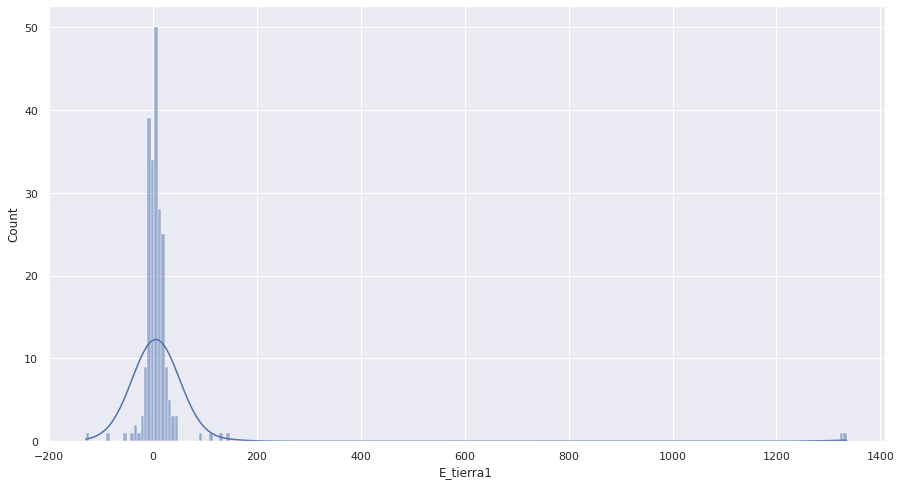

In [51]:
sns.histplot(data= df3.E_tierra1, kde= True)


Media filtrada =  4.44 minutos


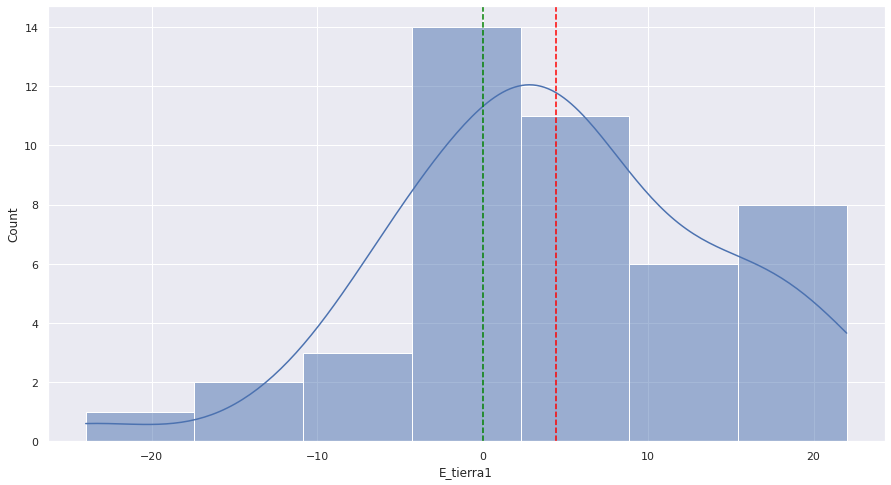

In [52]:
# Eliminar los outliers
#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')

In [53]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,T_teoricoTierra1,t_boarding
0,35.0,1.- <40
6,40.0,2.- 40
12,40.0,2.- 40
16,35.0,1.- <40
21,55.0,5.- 55


In [54]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['ARR']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('Error en el aterrizaje de Barcelona ', df4BarcelonaTierraError)

Error en el aterrizaje de Barcelona  -4.5


Text(0.5, 1.0, 'Error primer t. BOARDING principales aeropuertos:')

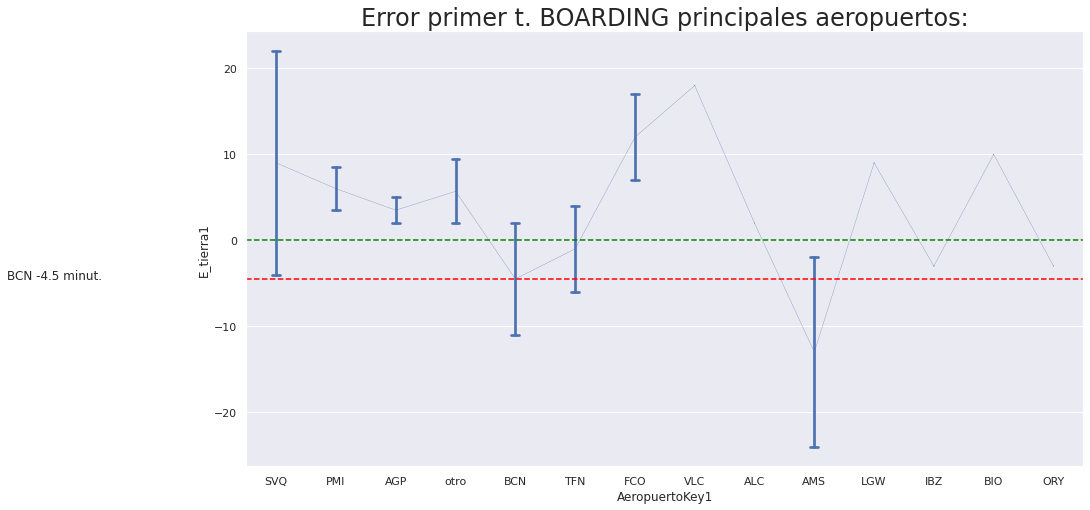

In [55]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

0 BCN          DATE   FLT     REG   AC  DEP  ARR                 STD  \
21 2022-01-01  3909  EC-KDX  320  PMI  BCN 2022-01-01 17:35:00   
42 2022-01-01  2114  EC-LLM  320  AGP  BCN 2022-01-01 07:40:00   

                   STA                TKof                TDwn  ...  \
21 2022-01-01 18:30:00 2022-01-01 17:45:00 2022-01-01 18:22:00  ...   
42 2022-01-01 09:15:00 2022-01-01 07:55:00 2022-01-01 09:09:00  ...   

   Aeropuerto_Key3 Aeropuerto_Key4 Puntualidad2 Puntualidad3 Puntualidad4  \
21            otro             BCN         -9.0         -6.0        -14.0   
42             SVQ             BCN        -11.0        -21.0        -11.0   

   E_Despegue_Total  E_Duracion_Vuelo_Total  E_tierra_Total E_acumulado_Total  \
21            -23.0                    -5.0             0.0             -28.0   
42            -20.0                   -26.0            19.0             -27.0   

   t_boarding  
21     5.- 55  
42     3.- 45  

[2 rows x 89 columns]
1 ORY           DATE   FLT     REG

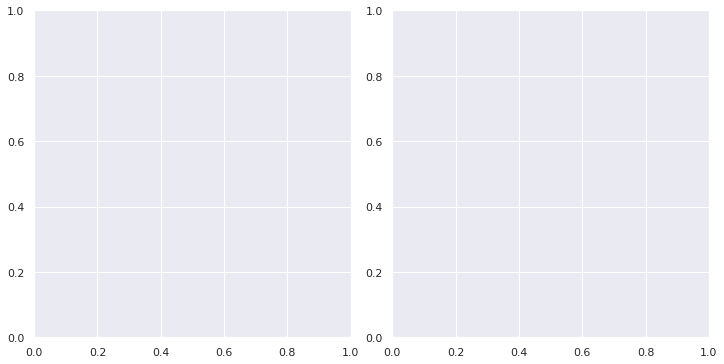

In [56]:
# Quiero hacer el subplot

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0

df_Aeropuertos
df_AeropuertosLista =df_Aeropuertos['AeropuertoKey1'].unique()
for k,v in enumerate(df_AeropuertosLista):
  df8=df3[df3['AeropuertoKey1']== v]
  #sns.distplot(df8['AeropuertoKey1'], ax=axs[index])
  index += 1
  print(k, v, df8)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [57]:
df3['AeropuertoKey1']

0       SVQ
6       PMI
12      AGP
16     otro
21      BCN
24      AGP
29     otro
33      PMI
34      PMI
36     otro
42      BCN
49      TFN
62     otro
66     otro
73      FCO
77     otro
79     otro
84      VLC
88     otro
92     otro
96      ALC
100    otro
106     AMS
108     FCO
112    otro
116     LGW
120    otro
124    otro
130     TFN
136     SVQ
140    otro
142     IBZ
146    otro
150     AMS
154     BIO
160    otro
162    otro
166    otro
172    otro
174    otro
181    otro
192     ORY
203    otro
207     PMI
217    otro
Name: AeropuertoKey1, dtype: object

In [58]:
df4BarcelonaTierra .head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,otro,BCN,-9.0,-6.0,-14.0,-23.0,-5.0,0.0,-28.0,5.- 55
42,2022-01-01,2114,EC-LLM,320,AGP,BCN,2022-01-01 07:40:00,2022-01-01 09:15:00,2022-01-01 07:55:00,2022-01-01 09:09:00,...,SVQ,BCN,-11.0,-21.0,-11.0,-20.0,-26.0,19.0,-27.0,3.- 45


In [59]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

1.- <40      15
2.- 40       15
3.- 45        7
7.- >60       4
4.- 50        2
5.- 55        2
NEGATIVOS     0
6.- 60        0
Name: t_boarding, dtype: int64

Text(0.5, 1.0, 'Error boarding BCN:')

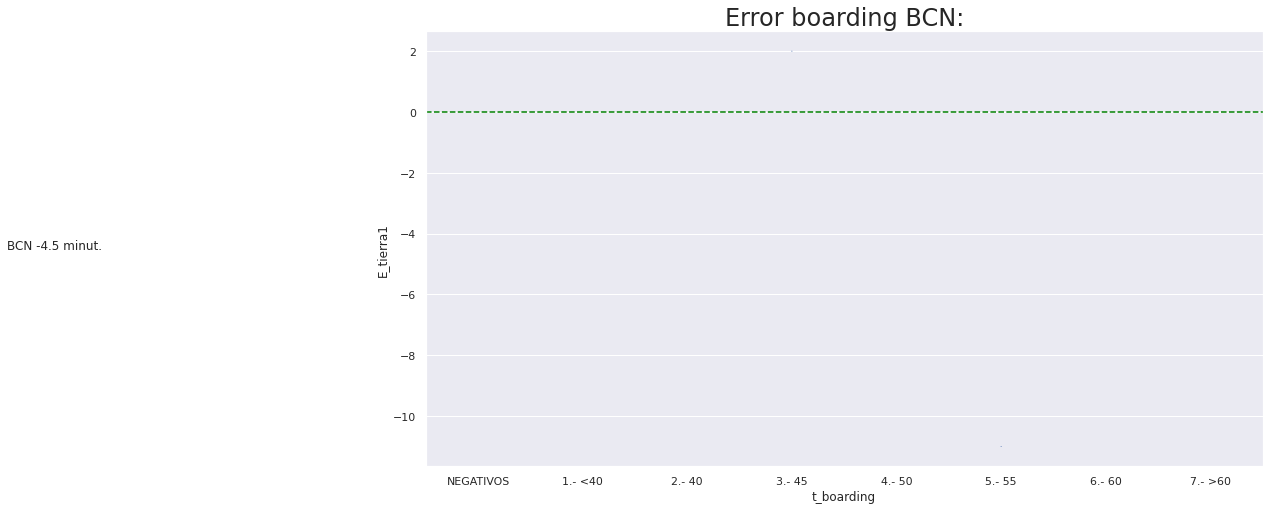

In [60]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [61]:
# Borro las columnas que no me interesan.

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [62]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [63]:
# Guardar excel
nombreFichero = "D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_JMML_" + Hoja + ".xlsx"

df3.to_excel(nombreFichero)
print()
print('Guardado fichero : ', nombreFichero)
print()


Guardado fichero :  D:\Documentos D.- Datos Vueling\Vueling_Python_MAR_JMML_FLT_2022.xlsx



In [64]:
# Pruebo esta manera de guardar el fichero EXCEL en DRIVE
# CUidado que la hora no coincide con la del ordenador


#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

dfRegistros1= (df3['Secuencia']== 1) 

df7 = df3[dfRegistros1]

path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
#df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

df7.to_excel(path)
print()
print('Guardado fichero :' , path)
print()
print()



Guardado fichero : /content/drive/MyDrive/Ficheros de Vueling/2022-09-15 07:37:58.391669 FLT_2022.xlsx




In [65]:
df7.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [66]:
print('forma ',df3.shape)
df3

forma  (45, 89)


,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SCQ,4.0,-5.0,-24.0,24.0,-34.0,6.0,-4.0,1.- <40
6,2022-01-01,3961,EC-JZI,320,SVQ,PMI,2022-01-01 07:30:00,2022-01-01 09:00:00,2022-01-01 07:21:00,2022-01-01 08:34:00,...,SVQ,otro,-21.0,-5.0,-8.0,-57.0,1.0,10.0,-46.0,2.- 40
12,2022-01-01,2117,EC-KDG,320,BCN,AGP,2022-01-01 14:20:00,2022-01-01 15:55:00,2022-01-01 14:40:00,2022-01-01 15:53:00,...,BCN,otro,6.0,-10.0,-13.0,2.0,-16.0,32.0,18.0,2.- 40
16,2022-01-01,3280,EC-KDH,320,BIO,ACE,2022-01-01 07:50:00,2022-01-01 10:40:00,2022-01-01 08:21:00,2022-01-01 10:55:00,...,BIO,VLC,-3.0,-22.0,-3.0,28.0,-37.0,11.0,2.0,1.- <40
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,otro,BCN,-9.0,-6.0,-14.0,-23.0,-5.0,0.0,-28.0,5.- 55
24,2022-01-01,2115,EC-KLB,320,BCN,AGP,2022-01-01 05:25:00,2022-01-01 07:00:00,2022-01-01 05:33:00,2022-01-01 06:41:00,...,otro,AGP,-16.0,5.0,-3.0,-6.0,-22.0,26.0,-2.0,7.- >60
29,2022-01-01,2915,EC-KLT,320,BCN,BOD,2022-01-01 07:30:00,2022-01-01 08:45:00,2022-01-01 07:45:00,2022-01-01 08:34:00,...,BCN,otro,-15.0,-12.0,-16.0,-18.0,-31.0,28.0,-21.0,1.- <40
33,2022-01-01,3926,EC-KMI,320,BCN,PMI,2022-01-01 12:05:00,2022-01-01 12:55:00,2022-01-01 12:14:00,2022-01-01 12:40:00,...,PMI,BCN,-16.0,-12.0,-16.0,-22.0,-32.0,33.0,-21.0,7.- >60
34,2022-01-01,3910,EC-KRH,320,BCN,PMI,2022-01-01 17:15:00,2022-01-01 18:05:00,2022-01-01 17:21:00,2022-01-01 17:47:00,...,BCN,otro,-12.0,-16.0,-9.0,-21.0,-32.0,37.0,-16.0,1.- <40
36,2022-01-01,1220,EC-LLJ,320,BCN,LYS,2022-01-01 07:45:00,2022-01-01 09:15:00,2022-01-01 07:57:00,2022-01-01 08:51:00,...,BCN,otro,-9.0,-15.0,-5.0,-5.0,-40.0,37.0,-8.0,2.- 40


# Estudio de la duracion del vuelo

In [67]:
# Identifico los Aeropuertos principales.


path =(r"/content/drive/MyDrive/Vueling_Trayectos_Duracion_Vuelo.xlsx")
 
#df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')

#path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")


df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(3)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY


In [68]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [69]:
# Solo escojo los datos que necesito para le calculo volando
'''
df.columns
df5 = df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',
                  'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)
'''

"\ndf.columns\ndf5 = df\nborrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',\n                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',\n                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',\n                  'T_RealTierra1', 't_Entre_Puertas']\n\ndf5 = df5.drop(borrarColumnas, axis=1)\ndf5.head(1)\n"

In [70]:
# Agrupo por Trayecto

df5 = df

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['DATE', 'REG', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,grupoTrayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SCQ,4.0,-5.0,-24.0,24.0,-34.0,6.0,-4.0,otro
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,SCQ,BIO,-5.0,-24.0,-6.0,-4.0,-27.0,12.0,-19.0,otro
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,BIO,TFN,-24.0,-6.0,-2.0,-19.0,-18.0,0.0,-37.0,otro


In [71]:
#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

dfRegistros1= (df5['Secuencia']== 1) 

df5 = df5[dfRegistros1]

path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
#df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

df5.to_excel(path)
print()
print('Guardado fichero :' , path)
print()


Guardado fichero : /content/drive/MyDrive/Ficheros de Vueling/2022-09-15 07:37:59.095459 FLT_2022.xlsx



/content/drive/MyDrive/Ficheros de Vueling

# Estudio de los tiempos de TAXI


In [72]:
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
217,13.0,6.0
218,15.0,4.0
219,16.0,4.0
220,11.0,13.0



Media =  13.37 minutos


Text(0.5, 1.0, 'Tiempo de Radadura Takeoff')

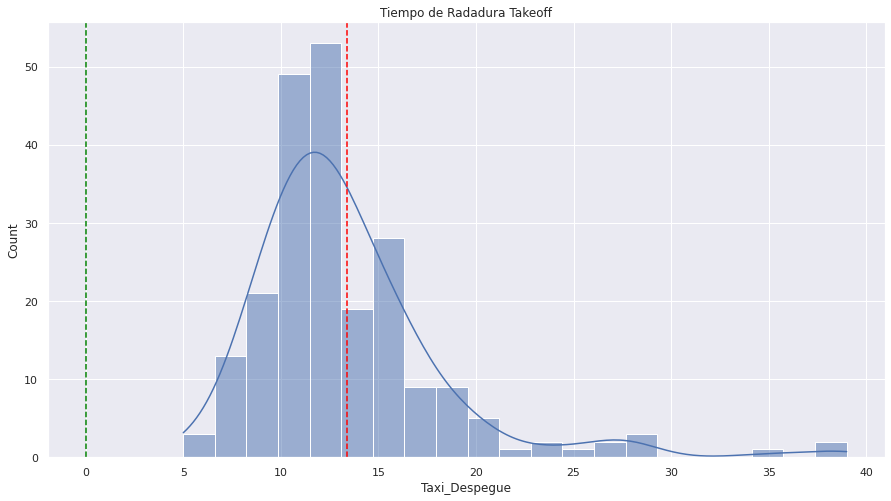

In [73]:
# Taxi Despegue:
dfEliminarOutliers= ((df['Taxi_Despegue'] <40) & (df['Taxi_Despegue'] >0))

df3 = df[dfEliminarOutliers]

ax = sns.histplot(data= df3.Taxi_Despegue, kde= True)
print()
print('Media = ', round(df3['Taxi_Despegue'].mean(),2), 'minutos')

media = round(df3['Taxi_Despegue'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de Radadura Takeoff')


Media =  5.25 minutos


Text(0.5, 1.0, 'Tiempo de rodadura Landing')

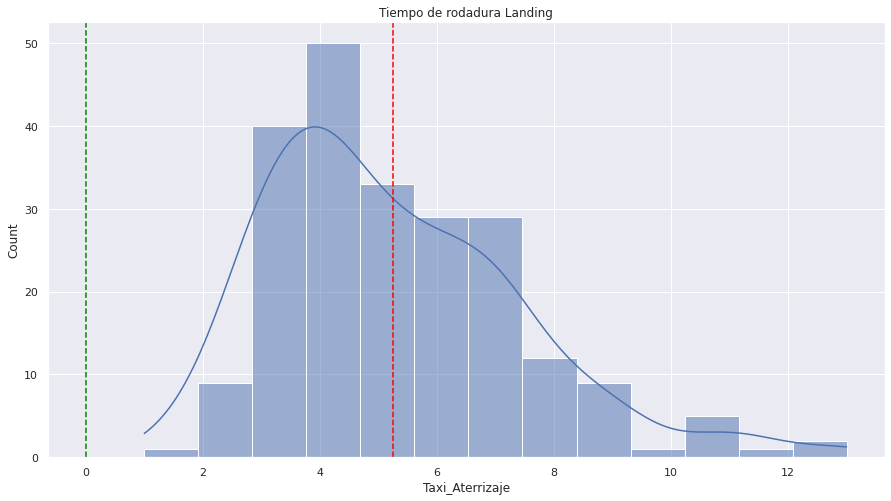

In [74]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df['Taxi_Aterrizaje'] <20) & (df['Taxi_Aterrizaje'] >0))

df3 = df[dfEliminarOutliers] 

ax = sns.histplot(data= df3.Taxi_Aterrizaje, kde= True)
print()
print('Media = ', round(df3['Taxi_Aterrizaje'].mean(),2), 'minutos')

media = round(df3['Taxi_Aterrizaje'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de rodadura Landing')

# Cantidad de tiempo que tardamos en vaciar y llenar un avion.

In [75]:
# Estudio la cantidad de tiempo que tardamos en vaciar y llenar un avion.

dfEliminarOutliers= ((df['REG'] == df['lag_REG']))

df3 = df[dfEliminarOutliers] 
df3['Total_Pasajeros_Boarding']= df3['ACT PAX'] +df3['lag_ACT PAX']

df3['t_Boarding_X_Pasajero'] = round((df3['Total_Pasajeros_Boarding']/ df3['T_RealTierra1']),2)

df3[4:10][['REG', 
           'lag_REG',
           'Total_Pasajeros_Boarding', 
           'ACT PAX', 'lag_ACT PAX',
           't_Boarding_X_Pasajero', 
           'T_Medio_Boarding']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,REG,lag_REG,Total_Pasajeros_Boarding,ACT PAX,lag_ACT PAX,t_Boarding_X_Pasajero,T_Medio_Boarding
4,EC-JSY,EC-JSY,276.0,155,121.0,7.46,7.5
6,EC-JZI,EC-JZI,175.0,57,118.0,3.89,3.9
7,EC-JZI,EC-JZI,241.0,118,123.0,5.36,5.4
8,EC-JZI,EC-JZI,123.0,123,0.0,4.24,4.2
9,EC-JZI,EC-JZI,125.0,0,125.0,3.05,3.0
10,EC-JZI,EC-JZI,219.0,125,94.0,6.44,6.4



Media =  4.27 minutos


Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto')

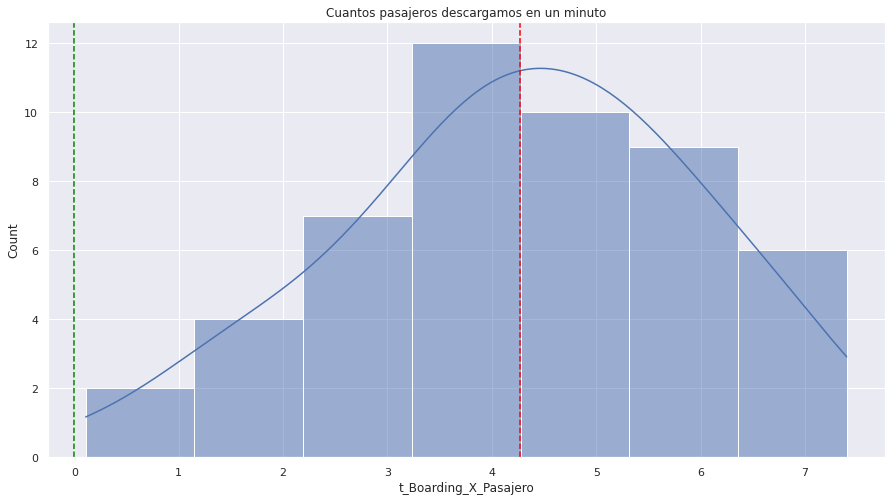

In [76]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df3['t_Boarding_X_Pasajero'] <20) & 
                     (df3['t_Boarding_X_Pasajero'] >-10) & 
                     (df3['Secuencia'] ==1))

df3 = df3[dfEliminarOutliers] 
variableHistograma = 't_Boarding_X_Pasajero'
ax = sns.histplot(data= df3.t_Boarding_X_Pasajero, kde= True)
print()
print('Media = ', round(df3[variableHistograma].mean(),2), 'minutos')

media = round(df3[variableHistograma].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Cuantos pasajeros descargamos en un minuto')

Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto por Aeropuerto:')

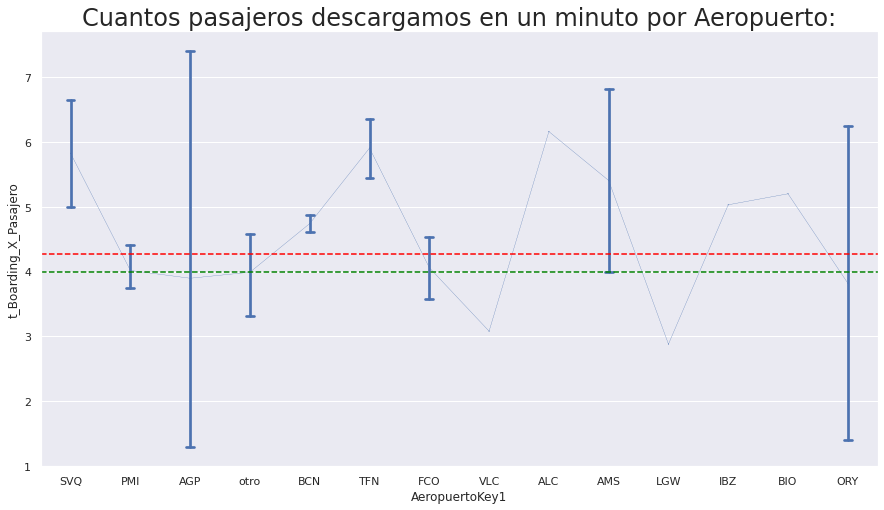

In [77]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
 
sns.set(rc = {'figure.figsize':(15,8)})  

# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = 't_Boarding_X_Pasajero', data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(4, color="green", linestyle = '--')


#textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
#ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Cuantos pasajeros descargamos en un minuto por Aeropuerto:', fontsize = 24)

In [78]:
df3['Secuencia']

0      1.0
6      1.0
12     1.0
16     1.0
21     1.0
24     1.0
29     1.0
34     1.0
36     1.0
42     1.0
49     1.0
53     1.0
57     1.0
62     1.0
66     1.0
73     1.0
77     1.0
79     1.0
84     1.0
88     1.0
92     1.0
96     1.0
100    1.0
106    1.0
108    1.0
112    1.0
116    1.0
120    1.0
124    1.0
130    1.0
136    1.0
140    1.0
142    1.0
146    1.0
150    1.0
154    1.0
160    1.0
162    1.0
166    1.0
172    1.0
174    1.0
178    1.0
181    1.0
186    1.0
192    1.0
198    1.0
203    1.0
207    1.0
211    1.0
217    1.0
Name: Secuencia, dtype: float64

# Estudio del SLOT

In [79]:
# Calculo el tiempo que hay de diferente entre SLOT v STD
df3= df.copy()
dfEliminarOutliers= ((df3['E_Despegue'] >20) &(df3['DEP'] =='BCN'))

df3 = df3[dfEliminarOutliers] 


#df3['E_SLOT']= df3['SLOT']-df3['STD']
df3[[ 'SLOT', 'STD', 'ATD', 'E_Despegue', 'DEP']]

,SLOT,STD,ATD,E_Despegue,DEP
91,,2022-01-01 19:05:00,2022-01-01 20:33:00,88.0,BCN
94,,2022-01-01 15:25:00,2022-01-01 15:47:00,22.0,BCN
106,,2022-01-01 17:30:00,2022-01-01 19:48:00,138.0,BCN
178,06:46:00,2022-01-01 06:00:00,2022-01-01 06:31:00,31.0,BCN
219,,2022-01-01 17:55:00,2022-01-01 18:23:00,28.0,BCN


# Estudio LF

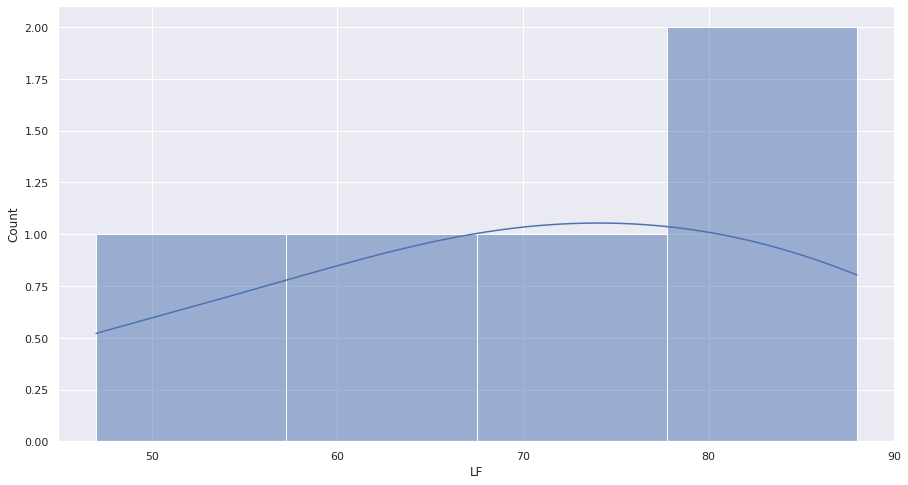

In [80]:
df['LF']
ax = sns.histplot(data= df3.LF, kde= True)

# Etudio tiempo desde que aterriza hasta que se abre la puerta cargo y PAX

In [81]:
df3=df.copy()

df3['retardoOperturaPuertaAterrizaje']=(df['Open Cargo/Pax Door']-df['ATA'])  /  np.timedelta64(1, 'm') 
df3[['retardoOperturaPuertaAterrizaje','Open Cargo/Pax Door', 'ATA']]

,retardoOperturaPuertaAterrizaje,Open Cargo/Pax Door,ATA
0,3.0,2022-01-01 09:23:00,2022-01-01 09:20:00
1,2.0,2022-01-01 11:11:00,2022-01-01 11:09:00
2,1.0,2022-01-01 12:46:00,2022-01-01 12:45:00
3,1.0,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0.0,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
217,0.0,2022-01-01 13:51:00,2022-01-01 13:51:00
218,2.0,2022-01-01 16:56:00,2022-01-01 16:54:00
219,1.0,2022-01-01 20:20:00,2022-01-01 20:19:00
220,0.0,2022-01-01 22:38:00,2022-01-01 22:38:00


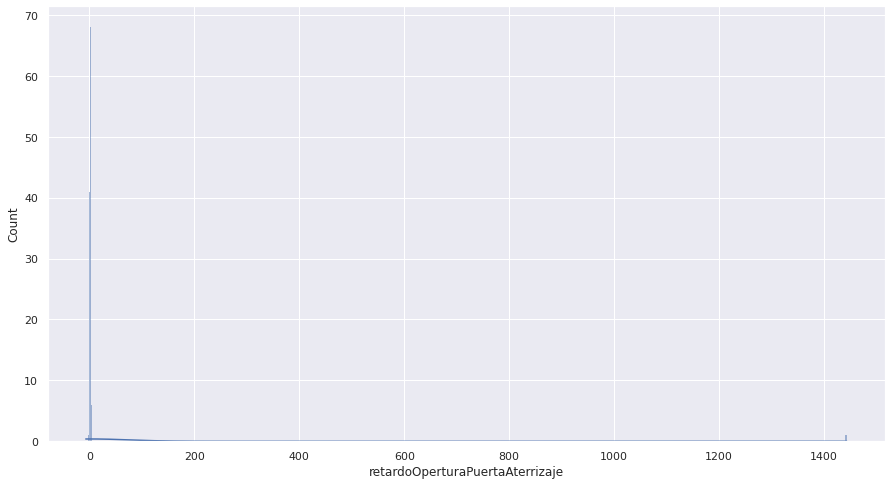

In [82]:
ax = sns.histplot(data= df3.retardoOperturaPuertaAterrizaje, kde= True)